In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_csv("Automobile_data.csv", na_values=['?', ' ?', '? '])
data=data.replace(['?'], np.nan)

In [3]:
df=data.copy()

# Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.shape

(205, 26)

In [6]:
df.head(7)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0


In [7]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

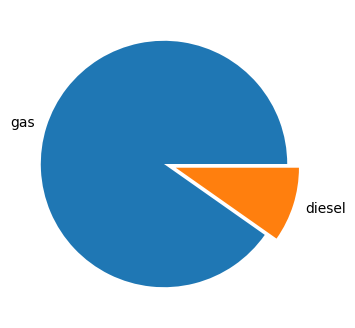

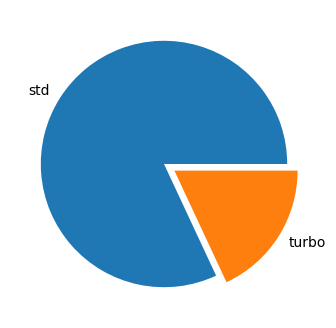

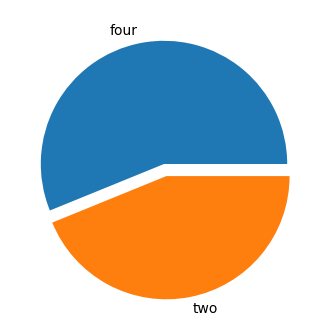

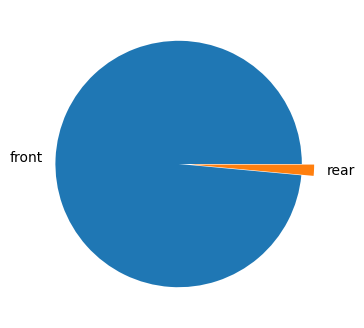

In [9]:
def pie_chart(cols):
    for col in cols:
        fig, ax = plt.subplots(figsize=(6,4))
        plt.pie(x=df[col].value_counts(), labels=list(df[col].value_counts().index), explode = (0, 0.1))
        plt.show()
pie_chart(['fuel-type', 'aspiration', 'num-of-doors', 'engine-location'])

# Data Preprocessing

In [15]:
df.isnull().sum().sum()

59

In [12]:
nulls=df.isnull().sum()
print(nulls[nulls > 0])

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64


In [13]:
nulls=df.isnull().sum()/df.shape[0]
print(nulls[nulls > 0])

normalized-losses    0.200000
num-of-doors         0.009756
bore                 0.019512
stroke               0.019512
horsepower           0.009756
peak-rpm             0.009756
price                0.019512
dtype: float64


In [16]:
null_col_names=nulls[nulls>0].index
for col in null_col_names:
    print(col, df[col].dtypes)

normalized-losses float64
num-of-doors object
bore float64
stroke float64
horsepower float64
peak-rpm float64
price float64


In [17]:
df['num-of-doors']=df['num-of-doors'].fillna(df['num-of-doors'].value_counts().sort_values(ascending=False).index[0])

In [18]:
def fill_with_mean(df, cols):
    for col in cols:
        df[col]=df[col].fillna(np.round(df[col].mean() ,3))
    return df

In [19]:
df=fill_with_mean(df, ['bore', 'stroke', 'horsepower', 'peak-rpm', 'price'])

In [20]:
nulls=df.isnull().sum()
print(nulls[nulls > 0])

normalized-losses    41
dtype: int64


# Outlier Analysis

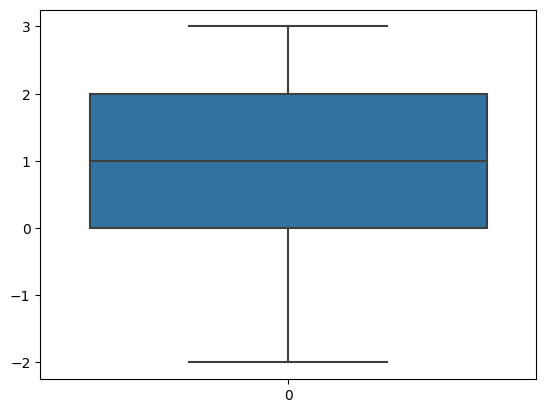

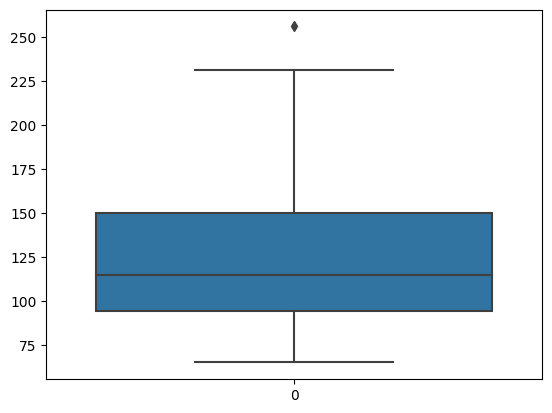

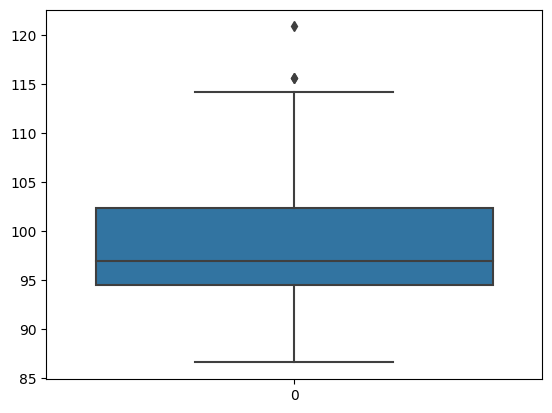

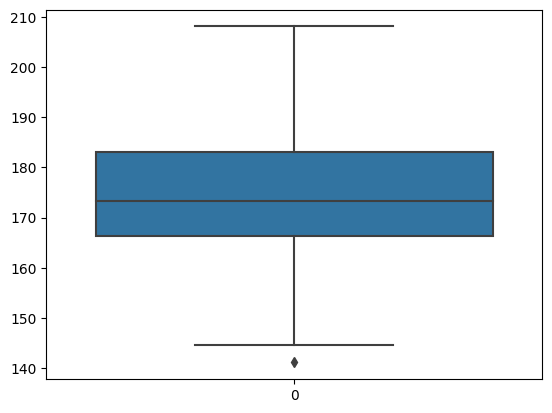

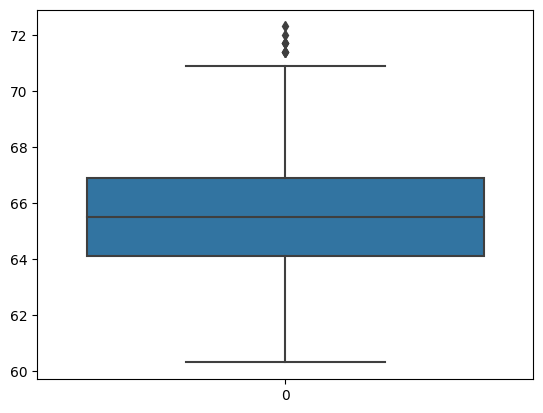

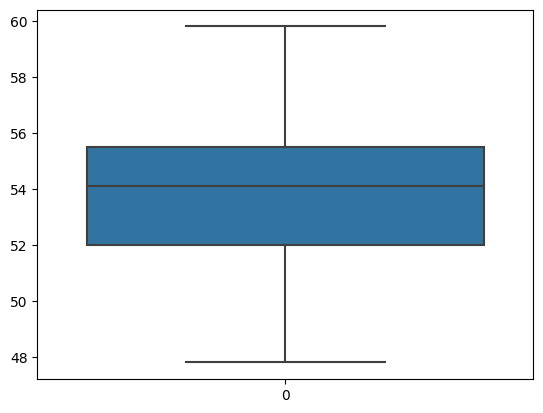

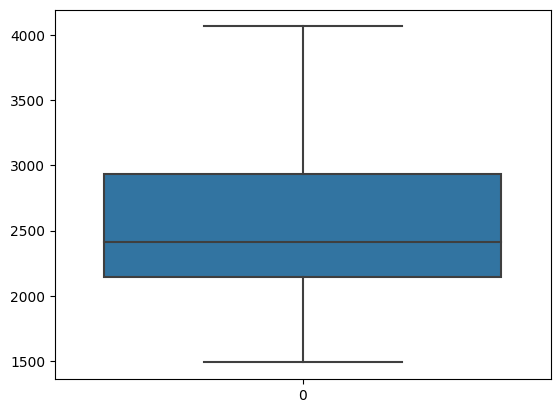

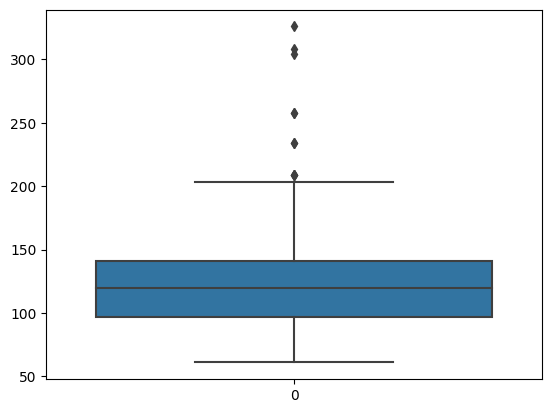

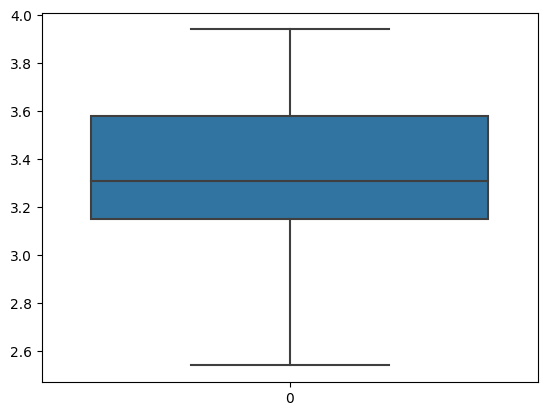

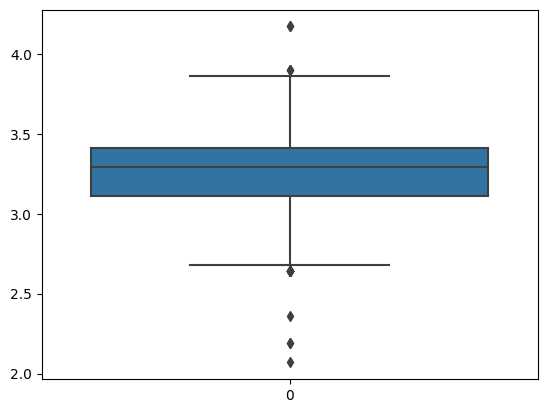

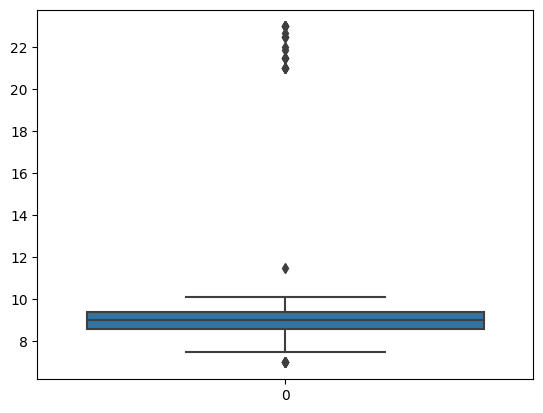

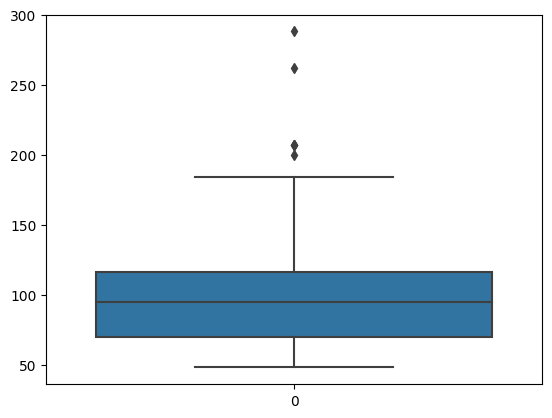

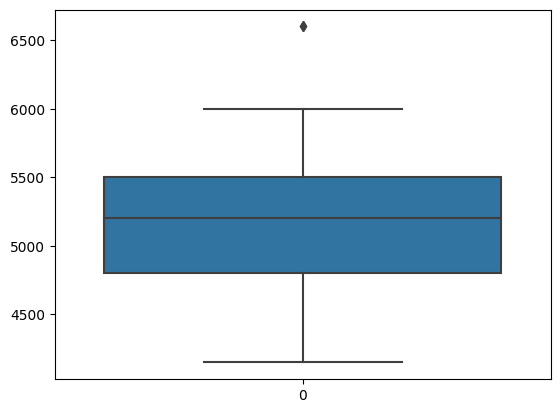

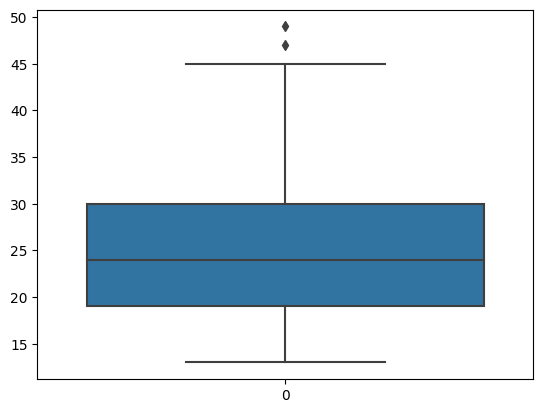

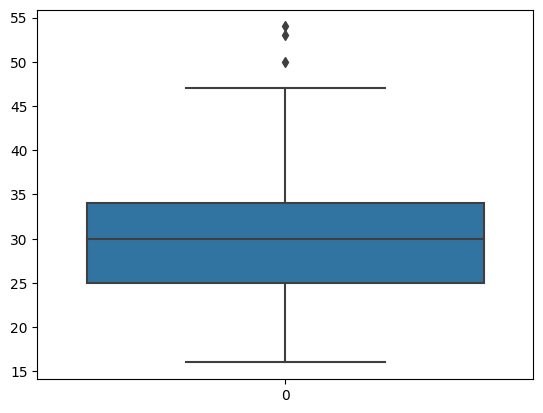

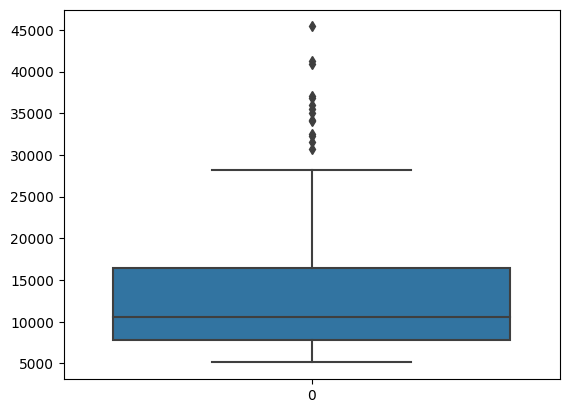

In [21]:
for col in df._get_numeric_data():
    sns.boxplot(df[col])
    plt.show()

In [22]:
def thresholds(dataframe, cols, q1=0.25, q3=0.75):
    for col_name in cols:
        quartile1 = dataframe[col_name].quantile(q1)
        quartile3 = dataframe[col_name].quantile(q3)
        IQR = quartile3 - quartile1
        up_limit = quartile3 + 1.5 * IQR
        low_limit = quartile1 - 1.5 * IQR
        dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    return dataframe

In [23]:
df=thresholds(df, ['normalized-losses', 'wheel-base', 'length', 'width', 'engine-size', 'stroke', 
                   'compression-ratio', 'horsepower', 'highway-mpg', 'price'])

In [24]:
df=df.query("`city-mpg`<45")

In [25]:
df=df.query("`highway-mpg`<48")

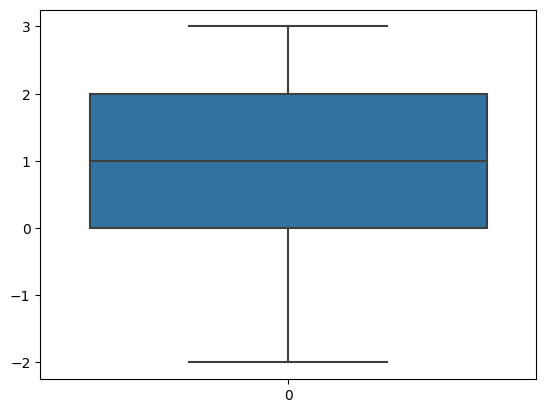

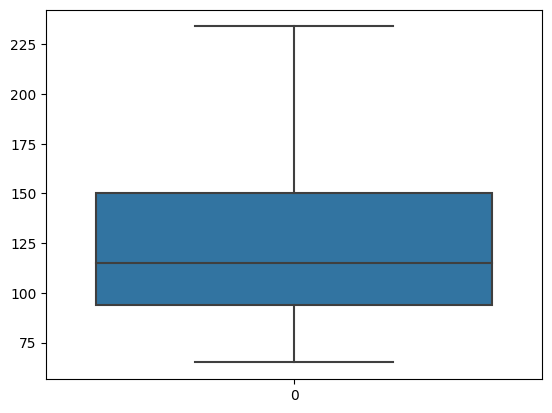

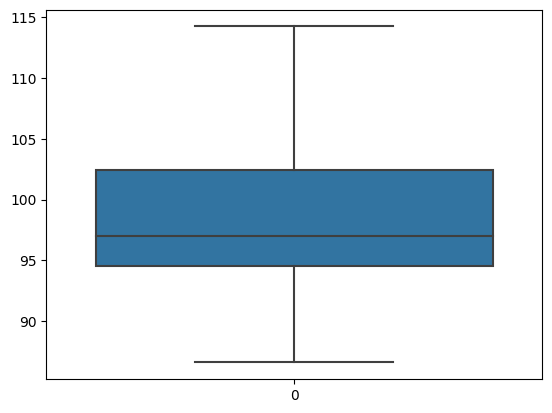

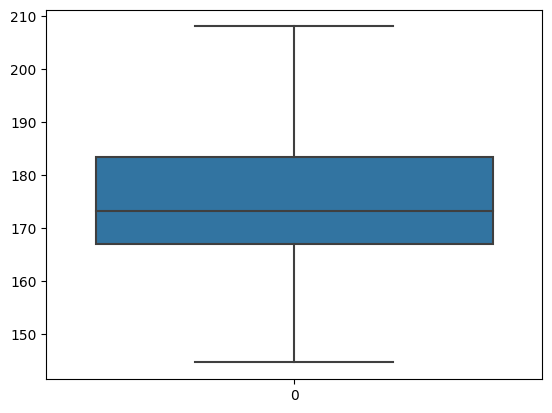

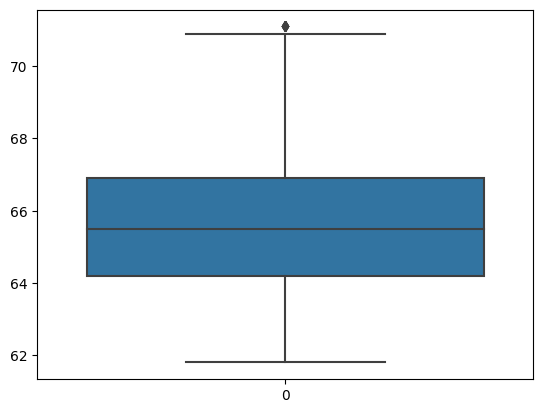

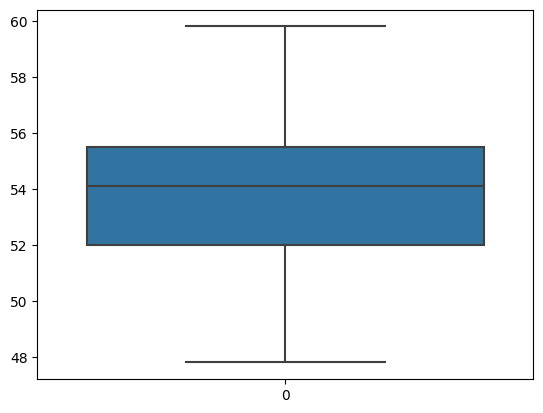

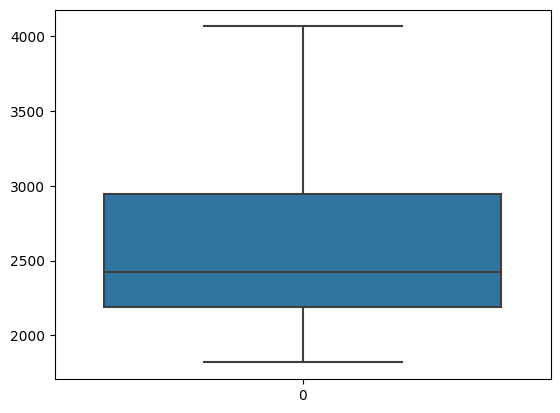

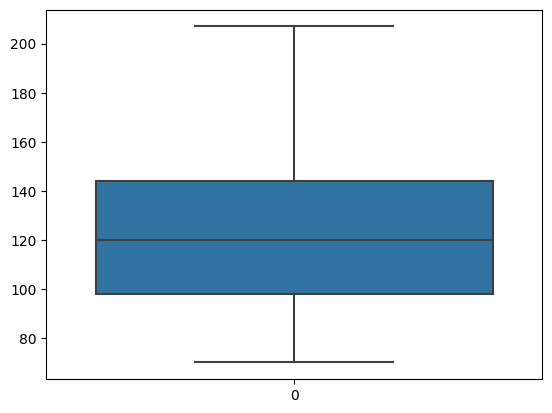

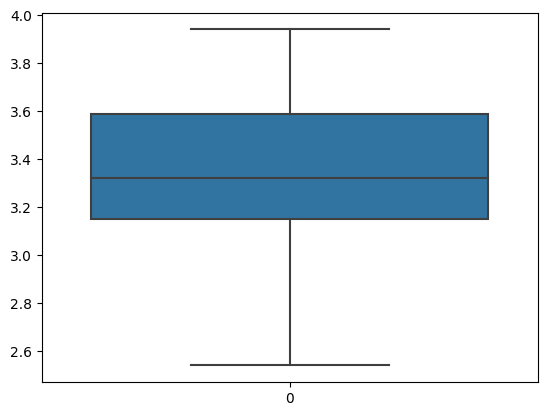

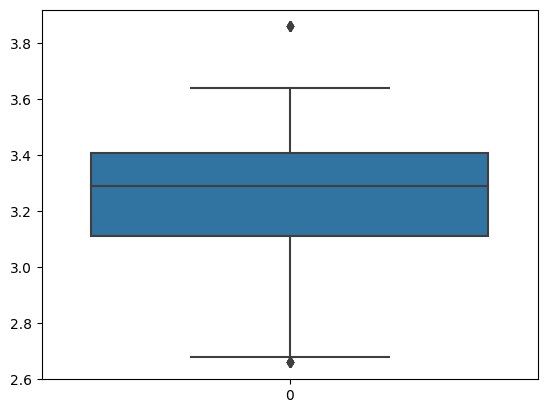

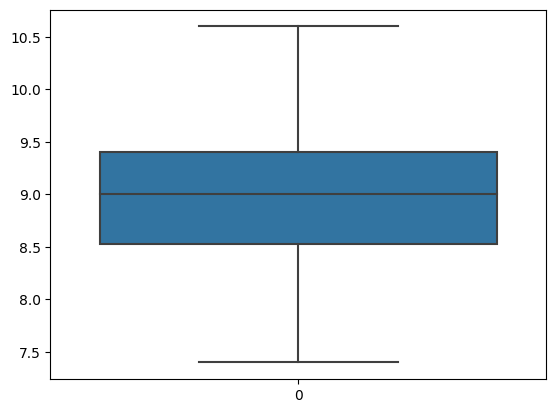

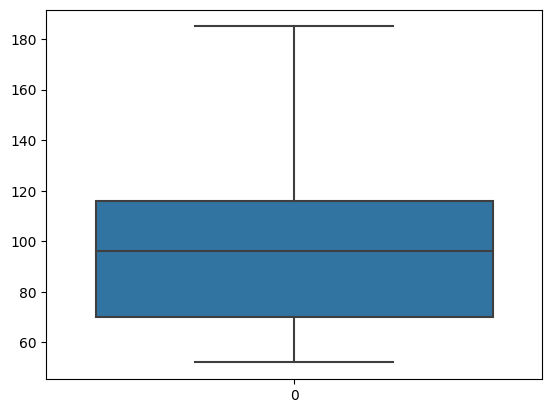

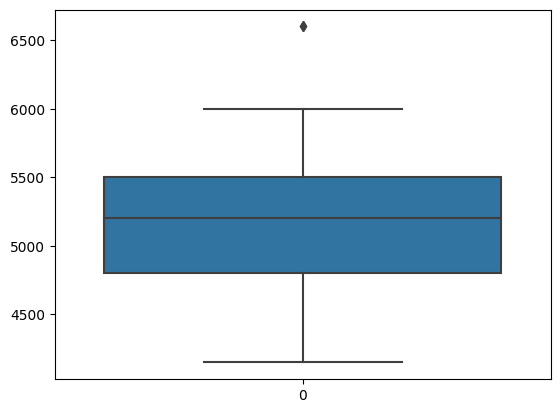

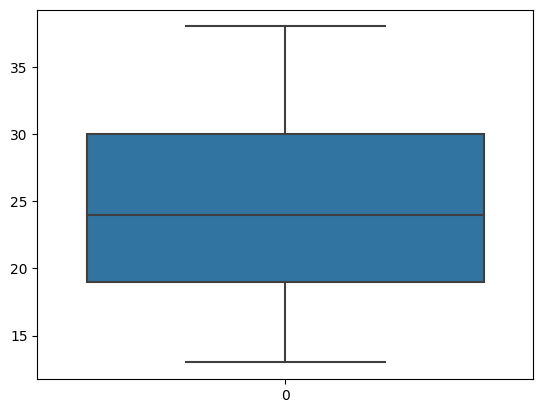

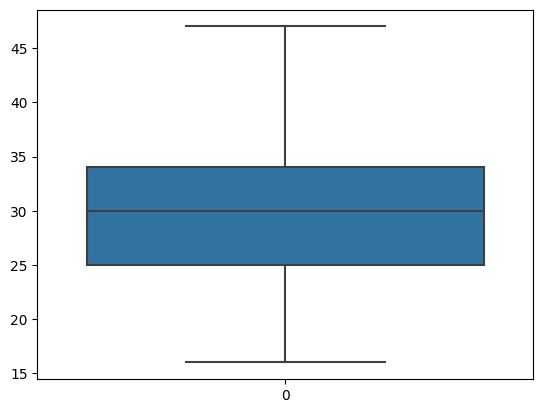

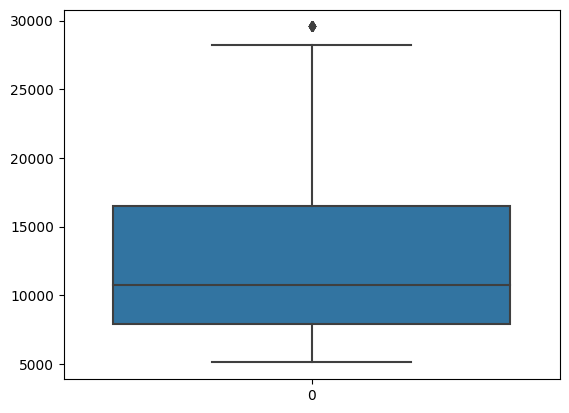

In [26]:
for col in df._get_numeric_data():
    sns.boxplot(df[col])
    plt.show()

# Encoding

In [27]:
df=pd.get_dummies(df, drop_first=True)

In [28]:
from sklearn.impute import KNNImputer

In [29]:
def knn_imputer(df, n):
    imputer = KNNImputer(n_neighbors = n)
    df_filled = imputer.fit_transform(df)
    df_knn_imp = pd.DataFrame(df_filled,columns = df.columns)
    return df_knn_imp

In [30]:
#Filling Null values with KNN imputer in normalized-loss column
df=knn_imputer(df, 4)

In [31]:
df.isnull().sum().sum()

0

# Building Model

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [34]:
X=df.drop('price', axis=1)
Y=df[['price']]

In [35]:
models=[LinearRegression(), Lasso(), Ridge()]

In [36]:
def reg_models(x, y, models):
    for model in models:
        X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.25, random_state=50)
        model.fit(X_train,Y_train)
        Y_test_pred=model.predict(X_test)
        print(model)
        print('Mean Squared Error: {}'.format(mean_squared_error(Y_test, Y_test_pred)))
        print('Regression Score(r2): {}'.format(r2_score(Y_test, Y_test_pred)))
        print('-----------------------------------------------------')

In [37]:
reg_models(X, Y, models)

LinearRegression()
Mean Squared Error: 4077029.349941182
Regression Score(r2): 0.9000909817972725
-----------------------------------------------------
Lasso()
Mean Squared Error: 3978836.8011108437
Regression Score(r2): 0.9024972242611891
-----------------------------------------------------
Ridge()
Mean Squared Error: 4661351.475454576
Regression Score(r2): 0.8857719654588162
-----------------------------------------------------


# HyperParameter Tuning

In [42]:
model_parameters={
    'Linear Regression':{
        'model': LinearRegression(),
        'params': {'fit_intercept': [True , False] 
                    }},
    'Lasso Regression': {
        'model': Lasso(),
        'params': {'selection': ['cyclic', 'random'], 
                  'alpha': [0.1,0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1]}},
    'Ridge Regression' : {
        'model': Ridge(),
        'params': {'alpha': [0.1, 0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1], 
                   'solver': ['auto', 'svd', 'cholesky']}}
}

In [43]:
def tuning(x, y, model_params):
    results=[]
    for model_name, mp in model_params.items():
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=50)
        clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
        clf.fit(X_train, Y_train)
        Y_test_pred=clf.predict(X_test)
        test_error=mean_squared_error(Y_test, Y_test_pred)
        r2score=r2_score(Y_test, Y_test_pred)                                                  
        print(model_name)
        print('Mean Squared Error: {}'.format(test_error))
        print('Regression Score(r2): {}'.format(r2score))
        print('------------------------------------------------------')
        results.append({'model': model_name, 
                        'MSE': test_error,
                        'R2 Score': r2score,
                        'best_score': clf.best_score_,
                        'best_params': clf.best_params_})
    return results

In [44]:
result = tuning(X, Y, model_parameters)

Linear Regression
Mean Squared Error: 4077029.349941182
Regression Score(r2): 0.9000909817972725
------------------------------------------------------
Lasso Regression
Mean Squared Error: 3975193.7286680187
Regression Score(r2): 0.9025864990148794
------------------------------------------------------
Ridge Regression
Mean Squared Error: 4661351.475454529
Regression Score(r2): 0.8857719654588173
------------------------------------------------------


In [45]:
res = pd.DataFrame(result)

In [49]:
res_sorted=res.sort_values('R2 Score', ascending = False)
res_sorted

,model,MSE,R2 Score,best_score,best_params
1,Lasso Regression,3.975194e+06,0.902586,0.803249,"{'alpha': 1, 'selection': 'random'}"
0,Linear Regression,4.077029e+06,0.900091,0.788840,{'fit_intercept': True}
2,Ridge Regression,4.661351e+06,0.885772,0.815338,"{'alpha': 1, 'solver': 'svd'}"


In [47]:
res_sorted.to_csv('result.csv',index=False)

# Final Model

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
model=Lasso(alpha=1, selection='cyclic')
model.fit(X_train, Y_train)
Y_test_pred=model.predict(X_test)
test_error=mean_squared_error(Y_test, Y_test_pred)
r2score=r2_score(Y_test, Y_test_pred) 
print('Mean Squared Error: {}'.format(test_error))
print('Regression Score(r2): {}'.format(r2score))

Mean Squared Error: 3978836.8011108437
Regression Score(r2): 0.9024972242611891
